# BLO0021 - 2048 SOLVER 

In [2]:
import numpy as np 
import copy as cp
import random
import math
import os

# BASIC RULES AND SOLVER LOGIC PREPARATIONS

In [3]:
def add_score(sc, val):
    sc += val
    return sc

def move_left(grid, score, max_tile, moves):
    for i in range(4):
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(non_zero + zero)
        for j in range(3):
            if grid[i,j] == grid[i,j+1]:
                grid[i,j] *= 2
                score = add_score(score, grid[i,j])
                grid[i,j+1] = 0
                moves += 1
                max_tile = max(max_tile, grid[i,j])
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(non_zero + zero)
    return grid, score, max_tile, moves

def move_right(grid, score, max_tile, moves):
    for i in range(4):
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(zero + non_zero[::-1])
        for j in range(3, 0, -1):
            if grid[i,j] == grid[i,j-1]:
                grid[i,j] *= 2
                score = add_score(score, grid[i,j])
                grid[i,j-1] = 0
                moves += 1
                max_tile = max(max_tile, grid[i,j])
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(zero + non_zero[::-1])
    return grid, score, max_tile, moves

def move_up(grid, score, max_tile, moves):
    for i in range(4):
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(non_zero + zero)
        for j in range(3):
            if grid[j,i] == grid[j+1,i]:
                grid[j,i] *= 2
                score = add_score(score, grid[j,i])
                grid[j+1,i] = 0
                moves += 1
                max_tile = max(max_tile, grid[j,i])
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(non_zero + zero)
    return grid, score, max_tile, moves

def move_down(grid, score, max_tile, moves):
    for i in range(4):
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(zero + non_zero[::-1])
        for j in range(3, 0, -1):
            if grid[j,i] == grid[j-1,i]:
                grid[j,i] *= 2
                score = add_score(score, grid[j,i])
                grid[j-1,i] = 0
                moves += 1
                max_tile = max(max_tile, grid[j,i])
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(zero + non_zero[::-1])
    return grid, score, max_tile, moves


def add_new_number(grid):
    zero_indices = np.where(grid == 0)
    if len(zero_indices[0]) == 0:
        return False
    index = np.random.choice(len(zero_indices[0]))
    i, j = zero_indices[0][index], zero_indices[1][index]
    grid[i,j] = 2 if np.random.random() < 0.9 else 4
    return True


def check_game_over(grid):
    
    if np.all(grid) == False:
        return False
    
    for row in range(4):
        for col in range(4):
            if row != 3:
                if (grid[row,col]==grid[row+1,col]):
                    return False
            if col != 3:
                if (grid[row,col]==grid[row,col+1]):
                    return False
            
    return True


def check_win(grid):
    return 2048 in grid


def play_2048(grid, move, score, max_tile, moves):
    orig_grid = cp.deepcopy(grid)
    
    if check_game_over(grid):
        raise RuntimeError("GO")
        
    if move == 'left':
        grid, score, max_tile, moves = move_left(grid, score, max_tile, moves)
    elif move == 'right':
        grid, score, max_tile, moves = move_right(grid, score, max_tile, moves)
    elif move == 'up':
        grid, score, max_tile, moves = move_up(grid, score, max_tile, moves)
    elif move == 'down':
        grid, score, max_tile, moves = move_down(grid, score, max_tile, moves)
    else:
        raise ValueError("Invalid move")
   
    if check_win(grid):
        raise RuntimeError("WIN")

    if not np.array_equal(grid, orig_grid):
        add_new_number(grid)
    
    return grid, score, max_tile, moves


def new_game():
    score = 0
    moves = 0
    max_tile = 0
    grid = np.zeros((4, 4), dtype=int)
    add_new_number(grid)
    add_new_number(grid)
    
    return grid, score, max_tile, moves


def print_grid(grid, score, max_tile, moves):
    print('Score: ', score)
    print('Max Tile: ', max_tile)
    print('Moves: ', moves)
    print("+----+----+----+----+")
    for i in range(4):
        line = "|"
        for j in range(4):
            if grid[i,j] == 0:
                line += "    |"
            else:
                line += "{:4d}|".format(grid[i,j])
        print(line)
        print("+----+----+----+----+")
        
        

In [4]:
grid, score, max_tile, moves = new_game()
for i in range(1000):
    direction = np.random.choice(('left','right','up','down'))
    try:
        grid, score, max_tile, moves = play_2048(grid, direction, score, max_tile, moves)
    except RuntimeError as inst:
        if(str(inst)=="GO"):
            print("GAME OVER in ",(i+1)," moves")
        elif(str(inst)=="WIN"):
            print("WIN in ",(i+1)," moves")
        break
print_grid(grid, score, max_tile, moves)

GAME OVER in  125  moves
Score:  1048
Max Tile:  128
Moves:  338
+----+----+----+----+
|   2|   8|   2|   4|
+----+----+----+----+
|   8|   2|  16|   8|
+----+----+----+----+
|   2|  16| 128|  16|
+----+----+----+----+
|   4|  32|   4|   2|
+----+----+----+----+


# RANDOM SOLVER

In [5]:
def random_solver(grid, score, max_tile, moves, max_moves=1000):
    directions = ['left', 'right', 'up', 'down']
    for i in range(max_moves):
        direction = random.choice(directions)
        try:
            if direction == 'left':
                grid, score, max_tile, moves = move_left(grid, score, max_tile, moves)
            elif direction == 'right':
                grid, score, max_tile, moves = move_right(grid, score, max_tile, moves)
            elif direction == 'up':
                grid, score, max_tile, moves = move_up(grid, score, max_tile, moves)
            elif direction == 'down':
                grid, score, max_tile, moves = move_down(grid, score, max_tile, moves)
            add_new_number(grid)  
        except RuntimeError as inst:
            if str(inst) == "GO":
                print(f"GAME OVER in {i + 1} moves")
                break
            elif str(inst) == "WIN":
                print(f"WIN in {i + 1} moves")
                break

    return grid, score, max_tile, moves



Testing ...

In [6]:
grid, score, max_tile, moves = new_game()

grid, score, max_tile, moves = random_solver(grid, score, max_tile, moves)

print_grid(grid, score, max_tile, moves)

Score:  956
Max Tile:  64
Moves:  325
+----+----+----+----+
|   8|   4|   2|   8|
+----+----+----+----+
|   2|  64|  32|   4|
+----+----+----+----+
|  16|   4|  64|   2|
+----+----+----+----+
|   2|   8|  32|   4|
+----+----+----+----+


# RULE_BASED HEURISTIC SOLVER

The first method I wanted to try was to use the **basic strategy** for solving the 2048 game. The strategy I implemented involves moving tiles towards the left and merging them wherever possible. This method primarily focuses on increasing the score and maximizing the `max_tile` value with each move. Additionally, I employed a **heuristic** approach, which prioritizes moves that result in larger tile combinations.

### Initial Approach
Initially, I implemented a **rule-based solver** that follows a greedy approach, moving tiles left, right, up, or down based on the current state of the grid. The objective was to combine smaller tiles into larger ones while keeping the largest tile in a corner. However, this method did not consistently reach the desired `max_tile` of 2048, with results often peaking at 1024.

### Using ChatGPT-4 Mini for Improvement
Next, I decided to use **ChatGPT 4o Mini** to help improve the solver. However, after experimenting with the model, I realized that it didn’t provide significant improvements to the solver. The results didn’t reach the goal of achieving 2048 as the `max_tile`.

### Using Google AI Studio
Given the limitations with ChatGPT, I turned to **Google AI Studio** to enhance the solver. I used the following prompt to guide the AI:

> "Here is a Python function that I use as a solver for the 2048 game. I need to improve it to achieve the max_tile of 2048. Use all available materials about the 2048 game to optimize this code. The solver should be based on the rules and strategy for the game. I need to maintain the same structure and values that I return; I need all of them. The `max_moves` is not important to me; what matters is achieving 2048. Please help me achieve this goal while keeping the code’s integrity."

### Heuristic Results and Final Decision
After applying the changes, the heuristic approach sometimes resulted in a `max_tile` of **1024**, which is a **significant improvement** compared to previous results. Though it didn't consistently reach 2048, the ability to reach 1024 showed that the solver was making **meaningful progress** in combining tiles.

Since this approach was showing promising results, I decided to **keep the heuristic** in the solution. Despite its limitations, the solver reached higher values than earlier methods, and it demonstrated the potential for further improvement.

In [7]:
def evaluate_grid_state(grid, current_max_tile, current_score):
    
    size = 4 
    heuristic_score = 0.0

    # --- Heuristic Weights (TUNE THESE!) ---
    WEIGHT_EMPTY = 20.0          # Strongly prefer empty cells
    WEIGHT_SMOOTHNESS = 0.1      # Penalize large differences between neighbours
    WEIGHT_MONOTONICITY = 1.0    # Reward rows/columns increasing towards corner
    WEIGHT_MAX_TILE_CORNER = 15.0 # High reward for max tile in corner
    WEIGHT_MAX_TILE_FACTOR = 1.0 # Reward higher max tiles overall
    WEIGHT_SCORE_FACTOR = 0.001  # Include score as a minor component
    WEIGHT_SNAKE_PATTERN = 2.0   # Reward for snake-like filling pattern

    empty_cells = 0
    smoothness = 0
    monotonicity_penalty = 0 
    max_pos_bonus = 0
    snake_score = 0

    log2_grid = np.zeros_like(grid, dtype=float)
    for r in range(size):
        for c in range(size):
            if grid[r, c] == 0:
                empty_cells += 1
            else:
                log2_grid[r, c] = math.log2(grid[r, c])

    heuristic_score += empty_cells * WEIGHT_EMPTY

    for r in range(size):
        for c in range(size):
            if grid[r, c] != 0:
                val = log2_grid[r, c]
                if c + 1 < size:
                    if grid[r, c+1] != 0:
                        neighbor_val = log2_grid[r, c+1]
                        smoothness -= abs(val - neighbor_val)
                        if neighbor_val < val: monotonicity_penalty += (val - neighbor_val) 
                    else:
                        smoothness -= val
                if r + 1 < size:
                     if grid[r+1, c] != 0:
                        neighbor_val = log2_grid[r+1, c]
                        smoothness -= abs(val - neighbor_val) 
                        if neighbor_val < val: monotonicity_penalty += (val - neighbor_val) 
                     else:
                         smoothness -= val 

    heuristic_score += smoothness * WEIGHT_SMOOTHNESS
    heuristic_score -= monotonicity_penalty * WEIGHT_MONOTONICITY


    corner_r, corner_c = size - 1, size - 1
    if grid[corner_r, corner_c] == current_max_tile and current_max_tile > 0:
        max_pos_bonus += log2_grid[corner_r, corner_c] * WEIGHT_MAX_TILE_CORNER
    else:
        found_max = False
        for r in range(size):
             for c in range(size):
                  if grid[r,c] == current_max_tile:
                      dist = (corner_r - r) + (corner_c - c)
                      if current_max_tile > 0:
                           max_pos_bonus -= dist * math.log2(current_max_tile) * 0.5 
                      found_max = True
                      break
             if found_max: break
        if not found_max and current_max_tile > 0: 
             max_pos_bonus -= 100 

    heuristic_score += max_pos_bonus

    for r in range(size):
        row_vals = log2_grid[r, :]
        if r % 2 == 0:
            for c in range(size - 1):
                if row_vals[c] > 0 and row_vals[c+1] > 0: 
                    if row_vals[c] >= row_vals[c+1]: snake_score += (row_vals[c] - row_vals[c+1])
                    else: snake_score -= (row_vals[c+1] - row_vals[c]) * 1.5 
        else:
            for c in range(size - 1):
                 if row_vals[c] > 0 and row_vals[c+1] > 0:
                    if row_vals[c] <= row_vals[c+1]: snake_score += (row_vals[c+1] - row_vals[c])
                    else: snake_score -= (row_vals[c] - row_vals[c+1]) * 1.5 
    heuristic_score += snake_score * WEIGHT_SNAKE_PATTERN

    if current_max_tile > 0:
      heuristic_score += math.log2(current_max_tile) * WEIGHT_MAX_TILE_FACTOR
    heuristic_score += current_score * WEIGHT_SCORE_FACTOR

    return heuristic_score


def rule_based_solver(grid, score, max_tile, moves, max_moves=10000):
    preferred_directions = ['down', 'right', 'left', 'up']
    all_directions = ['down', 'right', 'left', 'up'] 

    grid_size = 4 
    corner_r, corner_c = grid_size - 1, grid_size - 1

    for i in range(max_moves):
        best_move_direction = None
        best_heuristic_score = -float('inf')
        best_resulting_grid = None
        best_resulting_score = score
        best_resulting_max_tile = max_tile
        best_resulting_moves = moves 

        possible_moves = {} 

        for direction in all_directions:
            grid_to_simulate = cp.deepcopy(grid)
            score_to_simulate = score
            max_tile_to_simulate = max_tile
            moves_to_simulate = moves 

            if direction == 'left':
                sim_grid, sim_score, sim_max_tile, sim_moves = move_left(
                    grid_to_simulate, score_to_simulate, max_tile_to_simulate, moves_to_simulate)
            elif direction == 'right':
                sim_grid, sim_score, sim_max_tile, sim_moves = move_right(
                     grid_to_simulate, score_to_simulate, max_tile_to_simulate, moves_to_simulate)
            elif direction == 'up':
                sim_grid, sim_score, sim_max_tile, sim_moves = move_up(
                     grid_to_simulate, score_to_simulate, max_tile_to_simulate, moves_to_simulate)
            elif direction == 'down':
                sim_grid, sim_score, sim_max_tile, sim_moves = move_down(
                     grid_to_simulate, score_to_simulate, max_tile_to_simulate, moves_to_simulate)
            else: continue 

            if not np.array_equal(grid, sim_grid):
                current_heuristic = evaluate_grid_state(sim_grid, sim_max_tile, sim_score)

                possible_moves[direction] = {
                    'grid': sim_grid,
                    'score': sim_score,
                    'max_tile': sim_max_tile,
                    'moves': sim_moves, 
                    'heuristic': current_heuristic
                }

        if not possible_moves:
             print(f"GAME OVER - No valid moves left in iteration {i + 1}")
             break

        chosen_direction = None
        current_best_heuristic = -float('inf')

        for direction in preferred_directions:
            if direction in possible_moves:
                move_data = possible_moves[direction]
                effective_heuristic = move_data['heuristic']
                
                max_tile_in_bottom_row_before = (max_tile > 0 and np.any(grid[corner_r, :] == max_tile))

                if direction == 'up' and max_tile_in_bottom_row_before:
                    max_tile_still_in_bottom_after_up = (move_data['max_tile'] > 0 and np.any(move_data['grid'][corner_r, :] == move_data['max_tile']))
                    
                    if (move_data['max_tile'] != max_tile) or (not max_tile_still_in_bottom_after_up):
                         
                         penalty_multiplier = 0.5 
                         effective_heuristic *= penalty_multiplier
                        
                if effective_heuristic > current_best_heuristic:
                    current_best_heuristic = effective_heuristic
                    chosen_direction = direction

        if chosen_direction is None:
            for direction, move_data in possible_moves.items():
                 if move_data['heuristic'] > current_best_heuristic:
                      current_best_heuristic = move_data['heuristic']
                      chosen_direction = direction

        if chosen_direction is None:
             print(f"CRITICAL ERROR: No move selected in iteration {i + 1} despite possible moves existing.")
            
             if possible_moves:
                 chosen_direction = random.choice(list(possible_moves.keys()))
                 print(f"--- Choosing random valid move: {chosen_direction} ---")
             else:
            
                 print("--- No possible moves at all, breaking. ---")
                 break 

        best_move_data = possible_moves[chosen_direction]
        grid = best_move_data['grid']
        score = best_move_data['score']
        
        max_tile = best_move_data['max_tile']
        moves = best_move_data['moves'] 

        grid_before_add = cp.deepcopy(grid)
        if not add_new_number(grid):
             print(f"GAME OVER - Board full after move {chosen_direction} in iteration {i + 1}")
             break

        current_max_on_board = np.max(grid)
        if current_max_on_board > max_tile:
             max_tile = current_max_on_board
        if max_tile == 0 and current_max_on_board > 0:
            max_tile = current_max_on_board


        if check_win(grid): 
            print(f"\nWIN! Reached {max_tile} in {i + 1} solver steps.")
            break
        if check_game_over(grid):
            print(f"\nGAME OVER in {i + 1} solver steps.")
            break

    return grid, score, max_tile, moves

Testing ...

In [8]:
grid, score, max_tile, moves = new_game()

grid, score, max_tile, moves = rule_based_solver(grid, score, max_tile, moves)

print_grid(grid, score, max_tile, moves)


GAME OVER in 250 solver steps.
Score:  2968
Max Tile:  256
Moves:  1175
+----+----+----+----+
|   8|   2|   4|   8|
+----+----+----+----+
|   2|  16|  32|  16|
+----+----+----+----+
|   4|  32|  16|   4|
+----+----+----+----+
|   2|  16| 128| 256|
+----+----+----+----+


# MINIMAX WITH IMPROVEMENTS

In my quest to improve the **2048 solver** using AI techniques, I initially attempted to use a basic **Minimax algorithm**. 

### Step 1: Google AI Studio 
The first attempt to enhance the Minimax algorithm was made by using **Google AI Studio**. I asked the model to improve the existing Minimax code. The prompt was:

**Prompt to Google AI Studio:**
_"The next method I want to try is the Minimax algorithm. This is the basic structure of that algorithm, but it's too complicated and doesn't give good results for me. I need to make the solution better. So please improve the code, but not make it too complicated. Just try to make it faster and give better results."_

However, the output from **Google AI Studio** resulted in a **complex and difficult-to-understand code**. Despite the enhancements, the model did not achieve the desired result of consistently reaching the **2048 tile**, and the algorithm remained inefficient. This led me to abandon the Google AI Studio solution.

### Step 2: ChatGPT 4.0 Mini 
After not achieving satisfactory results with **Google AI Studio**, I decided to try **ChatGPT 4.0 mini** once again, hoping for a simpler and more effective solution. The prompt given to **ChatGPT 4.0 mini** was:

**Prompt to ChatGPT 4.0 mini:**
_"Please use the provided code to make it less complicated but still capable of achieving good results. Remove the comments and provide the final, simplified solution."_

The output was much more straightforward. The **Minimax algorithm** was optimized in a more efficient manner, resulting in an improved performance where the solver was able to achieve **higher max tiles** (though not always 2048). The algorithm was **simpler to understand**, and the results were more consistent.

The **Minimax algorithm** with **Alpha-Beta pruning** provides a reasonable approach to solving the 2048 game. However, the solution could still benefit from further **tuning of the heuristic functions** and **deeper look-ahead** strategies.

In [10]:
def evaluate_grid_state(grid, current_max_tile, current_score):

    size = 4
    heuristic_score = 0.0

    WEIGHT_EMPTY = 20.0
    WEIGHT_SMOOTHNESS = 0.1
    WEIGHT_MONOTONICITY = 1.0
    WEIGHT_MAX_TILE_CORNER = 15.0
    WEIGHT_MAX_TILE_FACTOR = 1.0
    WEIGHT_SCORE_FACTOR = 0.001
    WEIGHT_MERGING = 1.5  

    empty_cells = 0
    smoothness = 0
    monotonicity_penalty = 0
    max_pos_bonus = 0
    merge_score = 0

    log2_grid = np.zeros_like(grid, dtype=float)
    max_val_on_board = 0
    for r in range(size):
        for c in range(size):
            cell_val = grid[r, c]
            if cell_val == 0:
                empty_cells += 1
            else:
                log2_grid[r, c] = math.log2(cell_val)
                if cell_val > max_val_on_board:
                     max_val_on_board = cell_val

    actual_max_tile = max_val_on_board

    heuristic_score += empty_cells * WEIGHT_EMPTY

    for r in range(size):
        for c in range(size):
            if grid[r, c] != 0:
                val = log2_grid[r, c]
                if c + 1 < size:
                    if grid[r, c+1] != 0:
                        neighbor_val = log2_grid[r, c+1]
                        smoothness -= abs(val - neighbor_val)
                        if neighbor_val < val: monotonicity_penalty += (val - neighbor_val)
                if r + 1 < size:
                     if grid[r+1, c] != 0:
                        neighbor_val = log2_grid[r+1, c]
                        smoothness -= abs(val - neighbor_val)
                        if neighbor_val < val: monotonicity_penalty += (val - neighbor_val)

    heuristic_score += smoothness * WEIGHT_SMOOTHNESS
    heuristic_score -= monotonicity_penalty * WEIGHT_MONOTONICITY

    corner_r, corner_c = size - 1, size - 1
    if grid[corner_r, corner_c] == actual_max_tile and actual_max_tile > 0:
        max_pos_bonus += log2_grid[corner_r, corner_c] * WEIGHT_MAX_TILE_CORNER
    else:
        if actual_max_tile > 0:
            max_indices = np.argwhere(grid == actual_max_tile)
            if len(max_indices) > 0:
                max_r, max_c = max_indices[0]
                dist = abs(corner_r - max_r) + abs(corner_c - max_c)
                max_pos_bonus -= dist * math.log2(actual_max_tile) * 0.5

    heuristic_score += max_pos_bonus

    for r in range(size):
        for c in range(size):
            if c + 1 < size and grid[r, c] != 0 and grid[r, c] == grid[r, c + 1]:
                merge_score += log2_grid[r, c]
            if r + 1 < size and grid[r, c] != 0 and grid[r, c] == grid[r + 1, c]:
                merge_score += log2_grid[r, c]

    heuristic_score += merge_score * WEIGHT_MERGING

    if actual_max_tile > 0:
        heuristic_score += math.log2(actual_max_tile) * WEIGHT_MAX_TILE_FACTOR
    heuristic_score += current_score * WEIGHT_SCORE_FACTOR

    return heuristic_score


def minimax_alpha_beta(grid, score, max_tile, moves, depth, alpha, beta, maximizing_player=True):
    
    if depth == 0 or check_game_over(grid):
        return evaluate_grid_state(grid, max_tile, score)

    possible_moves = ['down', 'right', 'left', 'up']

    if maximizing_player:
        max_eval = -float('inf')
        for move in possible_moves:
            grid_sim = cp.deepcopy(grid)
            score_sim = score
            max_tile_sim = max_tile
            moves_sim = moves

            if move == 'left':
                new_grid, new_score, new_max_tile, new_moves = move_left(grid_sim, score_sim, max_tile_sim, moves_sim)
            elif move == 'right':
                new_grid, new_score, new_max_tile, new_moves = move_right(grid_sim, score_sim, max_tile_sim, moves_sim)
            elif move == 'up':
                new_grid, new_score, new_max_tile, new_moves = move_up(grid_sim, score_sim, max_tile_sim, moves_sim)
            elif move == 'down':
                new_grid, new_score, new_max_tile, new_moves = move_down(grid_sim, score_sim, max_tile_sim, moves_sim)

            if not np.array_equal(grid, new_grid):
                 eval_score = minimax_alpha_beta(new_grid, new_score, new_max_tile, new_moves, depth - 1, alpha, beta, False)
                 max_eval = max(max_eval, eval_score)
                 alpha = max(alpha, eval_score)
                 if beta <= alpha:
                     break
        return max_eval
    else:
        min_eval = float('inf')
        empty_cells = list(zip(*np.where(grid == 0)))

        if not empty_cells:
            return evaluate_grid_state(grid, max_tile, score)

        for r, c in empty_cells:
            grid_with_tile = cp.deepcopy(grid)
            grid_with_tile[r, c] = 2
            eval_score = minimax_alpha_beta(grid_with_tile, score, max_tile, moves, depth - 1, alpha, beta, True)
            min_eval = min(min_eval, eval_score)
            beta = min(beta, eval_score)
            if beta <= alpha:
                 break

        return min_eval


def best_move(grid, score, max_tile, moves, depth=3):
    
    possible_moves = ['down', 'right', 'left', 'up']
    best_m = None
    best_score = -float('inf')
    alpha = -float('inf')
    beta = float('inf')

    for move in possible_moves:
        grid_sim = cp.deepcopy(grid)
        score_sim = score
        max_tile_sim = max_tile
        moves_sim = moves

        if move == 'left':
            new_grid, new_score, new_max_tile, new_moves = move_left(grid_sim, score_sim, max_tile_sim, moves_sim)
        elif move == 'right':
            new_grid, new_score, new_max_tile, new_moves = move_right(grid_sim, score_sim, max_tile_sim, moves_sim)
        elif move == 'up':
            new_grid, new_score, new_max_tile, new_moves = move_up(grid_sim, score_sim, max_tile_sim, moves_sim)
        elif move == 'down':
            new_grid, new_score, new_max_tile, new_moves = move_down(grid_sim, score_sim, max_tile_sim, moves_sim)

        if not np.array_equal(grid, new_grid):
            move_eval = minimax_alpha_beta(new_grid, new_score, new_max_tile, new_moves, depth - 1, alpha, beta, False)
            if move_eval > best_score:
                best_score = move_eval
                best_m = move

            alpha = max(alpha, move_eval)

    return best_m


def minimax_solver(grid, score, max_tile, moves, max_moves=10000, depth=3):

    for i in range(max_moves):
        move = best_move(grid, score, max_tile, moves, depth)

        if move is None:
            print(f"GAME OVER - No valid moves found by solver in step {i+1}")
            break

        try:
            grid, score, max_tile, moves = play_2048(grid, move, score, max_tile, moves)
        except RuntimeError as inst:
             print(f"{str(inst)} detected in play_2048 during step {i + 1}")
             break

        current_max_on_board = np.max(grid) if np.any(grid) else 0
        if current_max_on_board > max_tile:
             max_tile = current_max_on_board

        if check_win(grid):
            print(f"WIN confirmed after step {i+1}")
            break
        if check_game_over(grid):
            print(f"GAME OVER confirmed after step {i+1}")
            break

    print(f"\nMinimax Solver finished.")
    return grid, score, max_tile, moves


Testing ...

In [20]:
grid, score, max_tile, moves = new_game()

grid, score, max_tile, moves = minimax_solver(grid, score, max_tile, moves)

print_grid(grid, score, max_tile, moves)

GAME OVER confirmed after step 488

Minimax Solver finished.
Score:  7160
Max Tile:  512
Moves:  2144
+----+----+----+----+
|   2|   4|   8|   2|
+----+----+----+----+
|   8|  64|  32|   8|
+----+----+----+----+
|  32| 128| 256|  16|
+----+----+----+----+
|   2|  16|   8| 512|
+----+----+----+----+


# EXPECTIMAX

At first, I decided to try the **Monte Carlo** method for solving the 2048 game. However, I quickly realized that it was too slow and not efficient enough to provide a good solution. While the algorithm is useful for some types of problems, it was not performing well for our case in the 2048 game, where quick and strategic decision-making is essential.

## Change of Approach

Given the inefficiency of Monte Carlo, I decided to explore other algorithms that might be more suitable for the 2048 game. I turned to **Google AI Studio** for advice on potential alternatives, hoping to find a method that could solve the game faster and more efficiently.

### My Prompt to Google AI Studio:
"Advise me on an algorithm to solve the 2048 game faster than Monte Carlo."

Google AI Studio suggested that **Expectimax** could be a good option for this problem. Expectimax is a popular algorithm in decision-making tasks where outcomes are uncertain and can help make better predictions about possible moves. 

### Second Query to Google AI Studio:
"Tell me the difference between greedy, minimax with alpha-beta pruning, and expectimax."

After analyzing the response and comparing the three methods, I decided to go ahead with **Expectimax** as my third algorithm.

### Decision to Implement Expectimax

Based on the suggestion from Google AI Studio and my own analysis, I opted to implement **Expectimax** for solving the 2048 game. Expectimax is an extension of the Minimax algorithm that incorporates the "expectation" of outcomes when dealing with uncertain actions. It is useful for games like 2048, where the exact placement of tiles after each move is uncertain. Expectimax takes into account not only the best possible move (like Minimax) but also the expected outcome based on probabilities of tile generation.

In [25]:
def expectimax_recursive(grid, score, max_tile, moves, depth, is_maximizing_player):
    
    if depth == 0 or check_game_over(grid):
        return evaluate_grid_state(grid, max_tile, score)

    if is_maximizing_player:
        max_eval = -float('inf')
        possible_moves = ['down', 'right', 'left', 'up'] 

        found_valid_move = False
        for move in possible_moves:
            grid_sim = cp.deepcopy(grid)
            score_sim, max_tile_sim, moves_sim = score, max_tile, moves

            if move == 'left':
                next_grid, next_score, next_max_tile, next_moves = move_left(grid_sim, score_sim, max_tile_sim, moves_sim)
            elif move == 'right':
                next_grid, next_score, next_max_tile, next_moves = move_right(grid_sim, score_sim, max_tile_sim, moves_sim)
            elif move == 'up':
                next_grid, next_score, next_max_tile, next_moves = move_up(grid_sim, score_sim, max_tile_sim, moves_sim)
            elif move == 'down':
                next_grid, next_score, next_max_tile, next_moves = move_down(grid_sim, score_sim, max_tile_sim, moves_sim)
            else: continue

            if not np.array_equal(grid, next_grid):
                found_valid_move = True
                eval_score = expectimax_recursive(next_grid, next_score, next_max_tile, next_moves, depth - 1, False) 
                max_eval = max(max_eval, eval_score)

        if not found_valid_move:
            return evaluate_grid_state(grid, max_tile, score)

        return max_eval

    else:
        total_expected_score = 0.0
        num_empty_cells = 0
        empty_cells_indices = list(zip(*np.where(grid == 0)))

        if not empty_cells_indices:
             return evaluate_grid_state(grid, max_tile, score)

        for r, c in empty_cells_indices:
            num_empty_cells += 1

            grid_with_2 = cp.deepcopy(grid)
            grid_with_2[r, c] = 2
            score_after_2 = expectimax_recursive(grid_with_2, score, max_tile, moves, depth - 1, True) 

            grid_with_4 = cp.deepcopy(grid)
            grid_with_4[r, c] = 4
            score_after_4 = expectimax_recursive(grid_with_4, score, max_tile, moves, depth - 1, True)

            total_expected_score += (0.9 * score_after_2 + 0.1 * score_after_4)

        if num_empty_cells == 0: return evaluate_grid_state(grid, max_tile, score) 
        average_score = total_expected_score / num_empty_cells
        return average_score


def expectimax_best_move(grid, score, max_tile, moves, depth=3):
    best_move_found = None
    best_score = -float('inf')
    possible_moves = ['down', 'right', 'left', 'up'] 

    for move in possible_moves:
        grid_sim = cp.deepcopy(grid)
        score_sim, max_tile_sim, moves_sim = score, max_tile, moves

        if move == 'left':
            next_grid, next_score, next_max_tile, next_moves = move_left(grid_sim, score_sim, max_tile_sim, moves_sim)
        elif move == 'right':
            next_grid, next_score, next_max_tile, next_moves = move_right(grid_sim, score_sim, max_tile_sim, moves_sim)
        elif move == 'up':
            next_grid, next_score, next_max_tile, next_moves = move_up(grid_sim, score_sim, max_tile_sim, moves_sim)
        elif move == 'down':
            next_grid, next_score, next_max_tile, next_moves = move_down(grid_sim, score_sim, max_tile_sim, moves_sim)
        else: continue

        if not np.array_equal(grid, next_grid):
             move_eval = expectimax_recursive(next_grid, next_score, next_max_tile, next_moves, depth - 1, False) 

             if move_eval > best_score:
                 best_score = move_eval
                 best_move_found = move

    if best_move_found is None:
        for move in possible_moves:
             grid_sim_fallback = cp.deepcopy(grid)
             if move == 'left': temp_grid,_,_,_ = move_left(grid_sim_fallback, score, max_tile, moves)
             elif move == 'right': temp_grid,_,_,_ = move_right(grid_sim_fallback, score, max_tile, moves)
             elif move == 'up': temp_grid,_,_,_ = move_up(grid_sim_fallback, score, max_tile, moves)
             elif move == 'down': temp_grid,_,_,_ = move_down(grid_sim_fallback, score, max_tile, moves)
             else: continue
             if not np.array_equal(grid, temp_grid):
                  return move 
            
    return best_move_found

def expectimax_solver(grid, score, max_tile, moves, max_moves=10000, depth=3):

    for i in range(max_moves):
        
        move = expectimax_best_move(grid, score, max_tile, moves, depth)

        if move is None: 
            print(f"\nGAME OVER - No valid moves found by Expectimax in step {i+1}")
            break

        try:
            grid, score, max_tile, moves = play_2048(grid, move, score, max_tile, moves)

            current_max_on_board = np.max(grid) if np.any(grid) else 0
            if current_max_on_board > max_tile: max_tile = current_max_on_board
            if max_tile == 0 and current_max_on_board > 0: max_tile = current_max_on_board

        except RuntimeError as inst:
             print(f"\n{str(inst).upper()} detected during play_2048 in step {i + 1}")
             break
        except Exception as e:
             print(f"\nError during play_2048 step {i+1}: {e}")
             break


        if check_win(grid):
            print(f"\nWIN confirmed after {i+1} solver steps.")
            break
        if check_game_over(grid):
            print(f"\nGAME OVER confirmed after {i+1} solver steps.")
            break


    print(f"\nExpectimax Solver finished.")
    return grid, score, max_tile, moves

Testing ...

In [26]:
grid, score, max_tile, moves = new_game()

grid, score, max_tile, moves = expectimax_solver(grid, score, max_tile, moves)

print_grid(grid, score, max_tile, moves)


GAME OVER confirmed after 842 solver steps.

Expectimax Solver finished.
Score:  14504
Max Tile:  1024
Moves:  3349
+----+----+----+----+
|   4|   8| 512|   4|
+----+----+----+----+
|   2|  16| 128|  32|
+----+----+----+----+
|   4|  32|  64|   2|
+----+----+----+----+
|   2|   8|  32|1024|
+----+----+----+----+


# RUN SOLVERS AND SAVE THE RESULTS

In [27]:
def create_directories(base_dir="solver_results"):
    solvers = ["random_solver", "rule_based", "minimax", "expectimax"]
    
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    for solver in solvers:
        solver_directory = os.path.join(base_dir, solver)
        if not os.path.exists(solver_directory):
            os.makedirs(solver_directory)
    
    print(f"Directories {base_dir} and subdirectories created!")



In [28]:
def run_solver_and_collect_results(solver, num_games=50):
    game_results = []  
    
    for game_num in range(num_games):
        grid, score, max_tile, moves = new_game()  
        
        grid, score, max_tile, moves = solver(grid, score, max_tile, moves)
        add_new_number(grid)
            
        game_results.append((score, max_tile, moves))
    
    return game_results

In [29]:
def save_results_to_file(solver_name, game_results):

    folder_path = f"solver_results/{solver_name}"
    results_file = os.path.join(folder_path, f"{solver_name}_results.txt")

    with open(results_file, 'w') as f:
        f.write("Score, Max Tile, Moves\n") 
        for result in game_results:
            f.write(f"{result[0]}, {result[1]}, {result[2]}\n")
    print(f"Results for {solver_name} saved to {results_file}")

In [30]:
def run_simple_solvers():
    create_directories()
    
    solvers = {
        "random_solver": random_solver,
        "rule_based": rule_based_solver,
        "minimax": minimax_solver,
        "expectimax": expectimax_solver
    }
    
    for solver_name, solver_function in solvers.items():
        print(f"Running {solver_name} for 30 games...")
        game_results = run_solver_and_collect_results(solver_function, num_games=30)
        save_results_to_file(solver_name, game_results)
        
        

In [31]:
run_simple_solvers()

Directories solver_results and subdirectories created!
Running random_solver for 30 games...
Results for random_solver saved to solver_results/random_solver\random_solver_results.txt
Running rule_based for 30 games...

GAME OVER in 247 solver steps.

GAME OVER in 646 solver steps.

GAME OVER in 763 solver steps.

GAME OVER in 691 solver steps.

GAME OVER in 383 solver steps.

GAME OVER in 531 solver steps.

GAME OVER in 461 solver steps.

GAME OVER in 266 solver steps.

GAME OVER in 685 solver steps.

GAME OVER in 253 solver steps.

GAME OVER in 446 solver steps.

GAME OVER in 354 solver steps.

GAME OVER in 600 solver steps.

GAME OVER in 556 solver steps.

GAME OVER in 288 solver steps.

GAME OVER in 368 solver steps.

GAME OVER in 224 solver steps.

GAME OVER in 466 solver steps.

GAME OVER in 678 solver steps.

GAME OVER in 480 solver steps.

GAME OVER in 418 solver steps.

GAME OVER in 295 solver steps.

GAME OVER in 387 solver steps.

GAME OVER in 371 solver steps.

GAME OVER in 

# STATISTICS FOR 30 GAMES

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
def analyze_solver_results(file_path, output_file):
    
    output_dir = os.path.dirname(output_file)
    if not os.path.exists(output_dir) and output_dir != '':
        os.makedirs(output_dir)
    
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    
    df = pd.DataFrame(data, columns=["Score", "Max Tile", "Moves"])
    
    lowest_score = df["Score"].min()
    highest_score = df["Score"].max()
    
    lowest_max_tail = df["Max Tile"].min()
    highest_max_tail = df["Max Tile"].max()
    
    lowest_moves = df["Moves"].min()
    highest_moves = df["Moves"].max()

    max_score_row = df.loc[df["Score"].idxmax()]
    max_score_details = (float(max_score_row["Score"]), float(max_score_row["Max Tile"]), float(max_score_row["Moves"]))


    min_score_row = df.loc[df["Score"].idxmin()]
    min_score_details = (float(min_score_row["Score"]), float(min_score_row["Max Tile"]), float(min_score_row["Moves"]))

    average_score = df["Score"].mean()
    average_max_tile = df["Max Tile"].mean()
    average_moves = df["Moves"].mean()

    print(f"Lowest Score: {lowest_score}")
    print(f"Highest Score: {highest_score}")
    print(f"Lowest Max Tail: {lowest_max_tail}")
    print(f"Highest Max Tail: {highest_max_tail}")
    print(f"Lowest Moves: {lowest_moves}")
    print(f"Highest Moves: {highest_moves}")
    print(f"Max Score Details: {max_score_details}")
    print(f"Min Score Details: {min_score_details}")
    print(f"Average Score: {average_score:.2f}")
    print(f"Average Max Tile: {average_max_tile:.2f}")
    print(f"Average Moves: {average_moves:.2f}")

    with open(output_file, 'w') as f:
        f.write(f"Lowest Score: {lowest_score}\n")
        f.write(f"Highest Score: {highest_score}\n")
        f.write(f"Lowest Max Tail: {lowest_max_tail}\n")
        f.write(f"Highest Max Tail: {highest_max_tail}\n")
        f.write(f"Lowest Moves: {lowest_moves}\n")
        f.write(f"Highest Moves: {highest_moves}\n")
        f.write(f"Max Details: {max_score_details}\n")
        f.write(f"Min Details: {min_score_details}\n")
        f.write(f"Average Score: {average_score:.2f}\n")
        f.write(f"Average Max Tile: {average_max_tile:.2f}\n")
        f.write(f"Average Moves: {average_moves:.2f}\n")
 

## Random solver

In [56]:
random_input = 'solver_results/random_solver/random_solver_results.txt' 
random_output ='solver_results/random_solver/random_solver_statistics.txt'
analyze_solver_results(random_input, random_output)

Lowest Score: 140.0
Highest Score: 1520.0
Lowest Max Tail: 16.0
Highest Max Tail: 128.0
Lowest Moves: 200.0
Highest Moves: 523.0
Max Score Details: (1520.0, 128.0, 483.0)
Min Score Details: (140.0, 16.0, 200.0)
Average Score: 950.93
Average Max Tile: 93.33
Average Moves: 373.30


## Rule based heuristic

In [53]:
rule_input = 'solver_results/rule_based/rule_based_results.txt' 
rule_output ='solver_results/rule_based/rule_based_statistics.txt'
analyze_solver_results(rule_input, rule_output)

Lowest Score: 2384.0
Highest Score: 12544.0
Lowest Max Tail: 128.0
Highest Max Tail: 1024.0
Lowest Moves: 1053.0
Highest Moves: 3018.0
Max Score Details: (12544.0, 1024.0, 2900.0)
Min Score Details: (2384.0, 128.0, 1053.0)
Average Score: 6462.80
Average Max Tile: 490.67
Average Moves: 1899.97


## Minimax 

In [54]:
minimax_input = 'solver_results/minimax/minimax_results.txt' 
minimax_output ='solver_results/minimax/minimax_statistics.txt'
analyze_solver_results(minimax_input, minimax_output)

Lowest Score: 2692.0
Highest Score: 18312.0
Lowest Max Tail: 128.0
Highest Max Tail: 1024.0
Lowest Moves: 1119.0
Highest Moves: 3727.0
Max Score Details: (18312.0, 1024.0, 3559.0)
Min Score Details: (2692.0, 128.0, 1119.0)
Average Score: 9827.60
Average Max Tile: 627.20
Average Moves: 2485.27


## Expectimax

In [55]:
file_path = 'solver_results/expectimax/expectimax_results.txt' 
output_file ='solver_results/expectimax/expectimax_statistics.txt'
analyze_solver_results(file_path, output_file)

Lowest Score: 1360.0
Highest Score: 19148.0
Lowest Max Tail: 64.0
Highest Max Tail: 1024.0
Lowest Moves: 720.0
Highest Moves: 4456.0
Max Score Details: (19148.0, 1024.0, 4456.0)
Min Score Details: (1360.0, 64.0, 720.0)
Average Score: 9971.47
Average Max Tile: 608.00
Average Moves: 2644.70


# VISUALISATION OF AVERAGE STATISTICS

In [70]:
def add_algorithm_column(file_path, algorithm_name):
    df = pd.read_csv(file_path, delimiter='\t', header=None)
    
    df[['Score', 'Max Tile', 'Moves']] = df[0].str.split(',', expand=True)
    
    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
    df['Max Tile'] = pd.to_numeric(df['Max Tile'], errors='coerce')
    df['Moves'] = pd.to_numeric(df['Moves'], errors='coerce')
    
    df['Algorithm'] = algorithm_name
    df = df.drop(columns=[0]) 
    df = df.dropna()
    return df

In [71]:
random_file = 'solver_results/random_solver/random_solver_results.txt'
rule_based_file = 'solver_results/rule_based/rule_based_results.txt'
minimax_file = 'solver_results/minimax/minimax_results.txt'
expectimax_file = 'solver_results/expectimax/expectimax_results.txt'

random_results = add_algorithm_column(random_file, 'Random')
rule_based_results = add_algorithm_column(rule_based_file, 'Rule-based')
minimax_results = add_algorithm_column(minimax_file, 'Minimax')
expectimax_results = add_algorithm_column(expectimax_file, 'Expectimax')

combined_results = pd.concat([random_results, rule_based_results, minimax_results, expectimax_results])

combined_results.to_csv('solver_results/combined_solver_results.csv', index=False)

combined_results.head()

,Score,Max Tile,Moves,Algorithm
1,1068.0,128.0,459.0,Random
2,956.0,128.0,430.0,Random
3,700.0,64.0,303.0,Random
4,872.0,64.0,385.0,Random
5,1520.0,128.0,483.0,Random


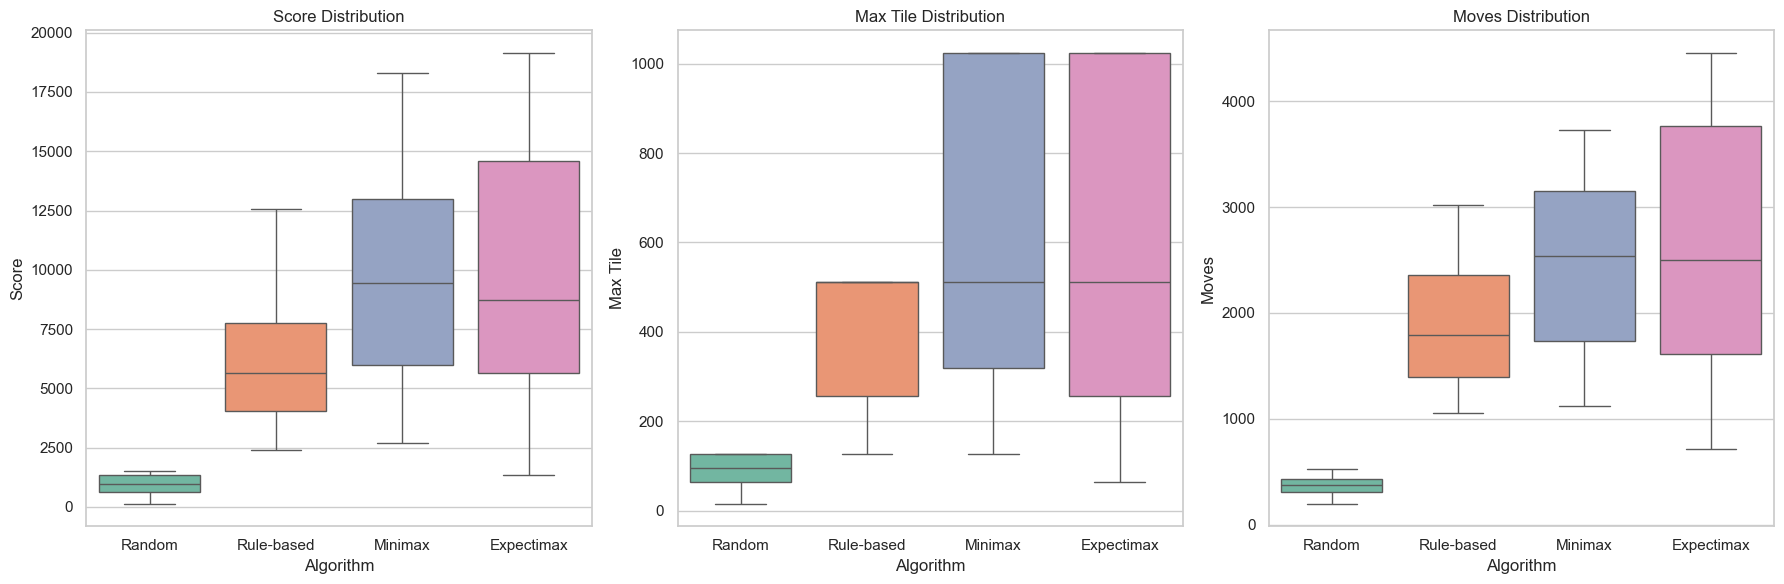

In [92]:
df = pd.read_csv('solver_results/combined_solver_results.csv')

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Algorithm', y='Score', data=df, ax=axes[0], hue='Algorithm', palette="Set2", showfliers=False)
axes[0].set_title('Score Distribution')

sns.boxplot(x='Algorithm', y='Max Tile', data=df, ax=axes[1], hue='Algorithm', palette="Set2", showfliers=False)
axes[1].set_title('Max Tile Distribution')

sns.boxplot(x='Algorithm', y='Moves', data=df, ax=axes[2], hue='Algorithm', palette="Set2", showfliers=False)
axes[2].set_title('Moves Distribution')

plt.tight_layout()

plt.show()
